<a href="https://colab.research.google.com/github/cfreis/machine_learning/blob/master/colabs/regressoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressões
Uma regressão é uma técnica estatística que permite inferir o valor de uma variável dependente, baseando-se nos valores de uma ou mais variáveis independentes.
Ela é um método que tenta modelar, com o menor erro possível o relacionamento entre variáveis.

Por exemplo, podemos estimar o valor do salário de um funcionário (variável dependente) levando-se em consideração o número de horas trabalhadas, escolaridade do funcionário e experiência que ele possui (variáveis independentes).

<center><img src="https://drive.google.com/uc?export=download&id=1v9s1LSetZJwx4ZjT6SeOJItm4GZJvF7O" width="200">
</center>

Aqui vamos tratar dos três tipos básicos de regressões:
* Regressão linear simples;
* [Regressão linear múltipla;](https://colab.research.google.com/drive/1XKsLM7bbthGHI-vV-64gJNdB65gm1bkS?usp=sharing)
* [Regressão logística.](https://colab.research.google.com/drive/1AixN6GvAPY3U-JlR9PS-GbICACTeZwkC?usp=sharing)



# Regressão linear simples
Uma regressão linear simples envolve apenas duas variáveis:
* Uma variável dependente; e
* Uma variável independente

Vamos tomar como exemplo o database do Kagglehub que correlaciona anos de experiência com o salário recebido.
<center>
<img src = "https://drive.google.com/uc?export=download&id=17KFF7GR2E-QON4TymA05e_9QwbmGOjfS" width=200>
</center>

Neste caso teremos como variável dependente o salário recebido e como variável independente o tempo de empresa.


In [1]:
%load_ext autoreload
%autoreload 2  # Reload dos modulos sempre que reiniciar

import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
# Estilo dos gráficos
sns.set_style("whitegrid")

# Download do dataset
path = kagglehub.dataset_download("karthickveerakumar/salary-data-simple-linear-regression")

# Importar o dataset e visualiza-lo
salarios = pd.read_csv(path + "/Salary_Data.csv")
salarios.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


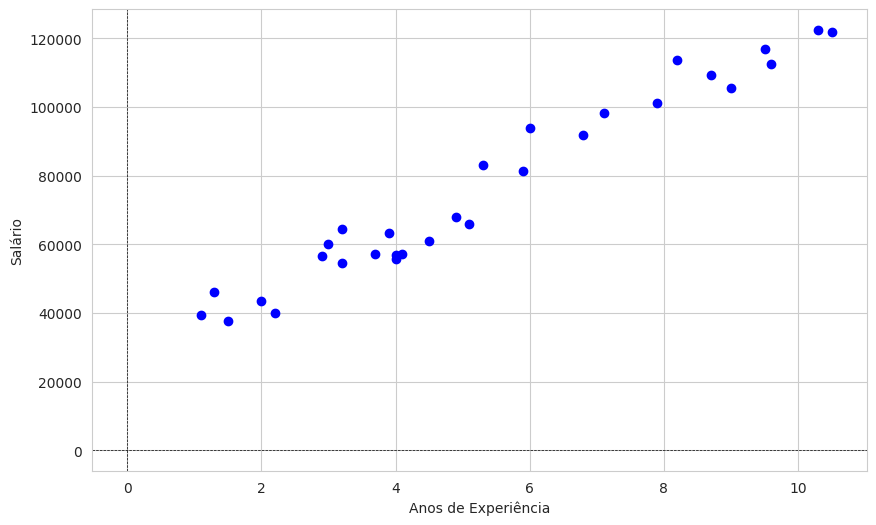

Figura 1


In [2]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo X
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo Y
ax.scatter(salarios.YearsExperience, salarios.Salary, color='blue', label='Dados Observados')
ax.set_xlabel('Anos de Experiência')
ax.set_ylabel('Salário')
plt.show()

print("Figura 1")


A Figura 1 exibe os dados de salário vs. anos de experiência.

O objetivo desse método é descobrir uma equação de reta melhor se ajuste ao conjunto de dados proposo, de forma que:

$
y = \alpha +\beta x + \epsilon\\
\text{onde:}\\
y \text{ - variável dependente}\\
x \text{ - variável independente}\\
\alpha \text{ - constante ou intercept}\\
\beta \text{ - slope ou inclinação da reta}\\
\epsilon \text{ - erro ou variação de y não explicada pelo modelo}
$

Isso é conseguido minimizando-se o erro entre o observado e o previsto pela reta, utilizando-se o método dos mínimos quadrados.

Nele, para cada ponto de coordenadas $(x_i,y_i)$ é calculado o erro, de forma que

$
y_i = a + b x_i + e_i \\
\text{ e } \\
S = \sum_{i=1}^N e_i^2\\
\text{onde:}\\
S \text{ - é a soma dos mínimos quadrados}
$

**Obs:** Durante o processo de estimativa utilizamos $a$ no lugar do $\alpha$, $b$ para $\beta$ e $e$ para $\epsilon$.  

Em tese, seriam realizadas aproximações sucessivas até se encontrar o menor somatório dos erros quadrados, conforme ilustrado na figura 2.

<div style="text-align: center; margin-top: 10px; font-family: Arial, sans-serif;">
<img src = "https://drive.google.com/uc?export=download&id=18drHfaG4ASLKjF9Tf0hrkpjgQFFstgNs" width=600>
    <p>Figura 2: Minimização do erro</p>
</div>

Na prática, isso pode ser calculado da seguinte forma:

$
b = r \dfrac{s_y}{s_x}\\
\text{onde:}\\
r \text{ é o coeficiente de correlação entre } x \text{ e } y\\
s_y \text{ é o desvio padrão de } y\\
s_x \text{ é o desvio padrão de } x\\
$

e

$
a = \bar y - b \bar x\\
\text{onde:}\\
\bar y \text{ é a média dos } y\\
\bar x \text{ é a média dos } x\\
$

Porém, esse cálculo é desnecessário, já que existem funções implementadas que realizam tal tarefa.

Uma vez ajustada a regressão linear, o seu intercept representará o ponto onde a reta encontra o eixo dos Y.

O slope definirá o tipo de correlação entre as variáveis dependente e independente, que pode ser interpretado da seguinte forma:

$\beta > 0$  - correlação diretamente proporcional, ou seja, conforme os valores de x aumentam os valores de y também aumentam.\\

$\beta < $0   - correlação inversamente proporcional, ou seja, conforme os valores de x aumentam os valores de y diminuem.\\




# Implementando uma regressão linear em Python

Inicialmente, vamos dividir nosso dataset em dois conjuntos, um de treinamento e outro de testes, a fim de validarmos o modelo após treinamento.



In [3]:
# Biblioteca de divisão do sklearn
from sklearn.model_selection import train_test_split

print(f'O total de registros do dataset é: {len(salarios)}')

# Separando salarios.YearsExperience,salarios.Salary
# e transformando de dataframe para array

X = salarios.YearsExperience.values.reshape(-1, 1)
y = salarios.Salary.values.reshape(-1, 1)

# Dividindo os dados em conjuntos de treinamento(80%) e teste (20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

print(f'O total de registros do conjunto de treinamento é: {len(X_train)} {X_train.shape}')
print(f'O total de registros y do conjunto de teste é: {len(y_train)} {X_test.shape}')
print(f'O total de registros do conjunto de teste é: {len(X_test)} {y_train.shape}')
print(f'O total de registros y do conjunto de teste é: {len(y_test)} {y_test.shape}')


O total de registros do dataset é: 30
O total de registros do conjunto de treinamento é: 24 (24, 1)
O total de registros y do conjunto de teste é: 24 (6, 1)
O total de registros do conjunto de teste é: 6 (24, 1)
O total de registros y do conjunto de teste é: 6 (6, 1)


Para realizar a regressão linear, utilizaremos a classe ```LinearRegression``` do ```sklearn```.

In [4]:
# Importa a classe
from sklearn.linear_model import LinearRegression
# Cria o modelo
lr = LinearRegression()
# Treina o modelo
lr.fit(X_train, y_train)

LinearRegression()

### Realizando predições

In [5]:
y_pred = lr.predict(X_test)
df_tmp = pd.DataFrame({'Salário Real': y_test.flatten(), 'Salário Previsto': y_pred.flatten()})
df_tmp

,Salário Real,Salário Previsto
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


### Visualizando os dados de treinamento, a reta da regressão linear e as previsões

a=25321.5830 
b=9423.8153
Equação da reta: y = 9423.8153x + 25321.5830


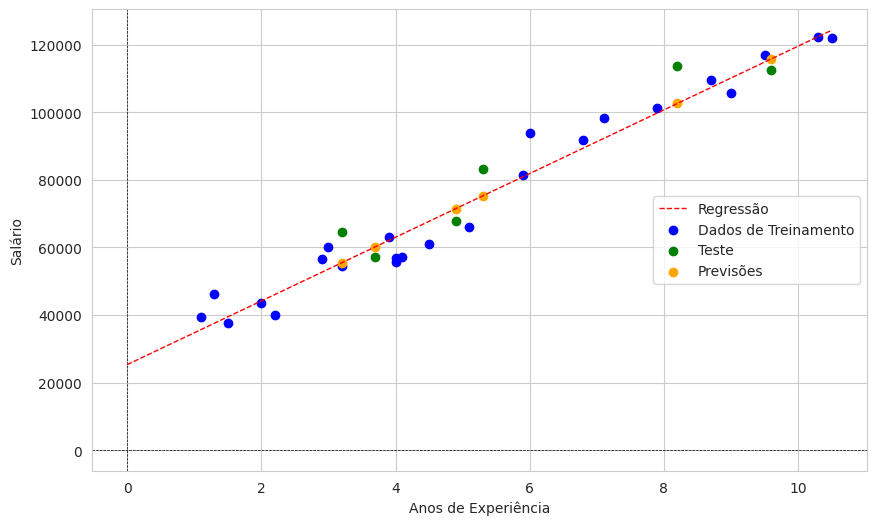

In [6]:
x_range = np.linspace(0, X.max(), 100)
y_range = lr.predict(x_range.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo X
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo Y

ax.plot(x_range, y_range, 'r--', linewidth=1, label=f'Regressão')
ax.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
ax.scatter(X_test,y_test, color='green', label="Teste")
ax.scatter(X_test, y_pred, color='orange', label='Previsões')
ax.legend()
ax.set_xlabel('Anos de Experiência')
ax.set_ylabel('Salário')
fig.show()

print(f'a={lr.intercept_.squeeze():.4f} \nb={lr.coef_.squeeze():.4f}')
print(f'Equação da reta: y = {lr.coef_.squeeze():.4f}x + {lr.intercept_.squeeze():.4f}')


## Interpretando os resultados de uma regressão linear
Criar, treinar e realizar previsões com uma regressão linear em Python é extremamente simples:

* Para criá-la, basta instanciar a classe, criando um objeto do tipo ``` LinearRegression ```, utilizando a instrução

```lr = LinearRegression()```

* Treiná-la é igualmente simples, utilizando o método ```fit``` que recebe como parâmetros os valores de treinamento da variável independente, seguido dos valores da variável dependente

``` lr.fit(X_train, y_train) ```

* Para visualizar os valores de predição, basta passar os valores da variável independente para o método ``` predict ``` que o objeto retornará o valores da predição

```y_pred = lr.predict(X_test)```

Podemos, ainda, recuperar os valores da inclinação da reta, também conhecida como slope ou coeficiente da reta, assim como o valor do ponto onde a reta corta o eixo das ordenadas (Y), também conhecido como intercept ou constante.

Para isso, podemos recuperar tais valores acessando as propriedades ```coef_``` e ```intercept``` do objeto ```LinearRegression```

In [7]:
print(f'Intercept da reta (a): {lr.intercept_.squeeze()}\n\t ou podemos dizer que quando x=0, y={lr.intercept_.squeeze()}')
print(f'Coeficiente da reta (b): {lr.coef_.squeeze()}')

print(f'\nE colocando tudo no formato y = bx +a, temos a equação da reta: \n\ty = {lr.coef_.squeeze():.4f}x + {lr.intercept_.squeeze():.4f}')

Intercept da reta (a): 25321.583011776813
	 ou podemos dizer que quando x=0, y=25321.583011776813
Coeficiente da reta (b): 9423.815323030976

E colocando tudo no formato y = bx +a, temos a equação da reta: 
	y = 9423.8153x + 25321.5830


Porém, apenas isso não é o suficiente. Devemos analisar a validade do modelo matemático gerado e sua capacidade de prever resultados corretamente.

O primeiro parâmetro que devemos analisar será o $R^2$ da reta. Ele representa a proporção na qual a variável dependente pode ser prevista pela variável independente. O valor de $R^2$ varia entre $(0,1)$, sendo que valores próximos a zero indicam que o modelo não possui capacidade alguma de prever a variação da variável dependente e valores próximos a 1, indicam que o modelo se encaixa muito bem nos dados apresentados.

Por exemplo, quando $R^2=0.239$, isso indica que aproximadamente $23.9%$ da variabilidade da variável dependente pode ser explicada pela variável indemendente do modelo.

Para acessar o valor do $R^2$ utilizamos o método ```score``` do objeto. Este recebe como parâmetro os valores da variável independente e dependente que desejamos testar. Note que valores diferentes geram $R^2$ diferentes. Para obtermos o valor de $R^2$ obtidos durante o treinamento, devemos informar, novamente, tais valores, conforme pode ser visto no código abaixo.

Valor do R² do treinamento: 0.9645401573418146
Valor do R² do dataset de teste: 0.9024461774180497
Valor do R² utilizando-se as predições do modelo: 1.0
Valor do R² de valores sem correlação: 0.0011582111228732872
a=0.5136 
b=-0.0335
Equação da reta: y = -0.0335x + 0.5136


(100, 1)

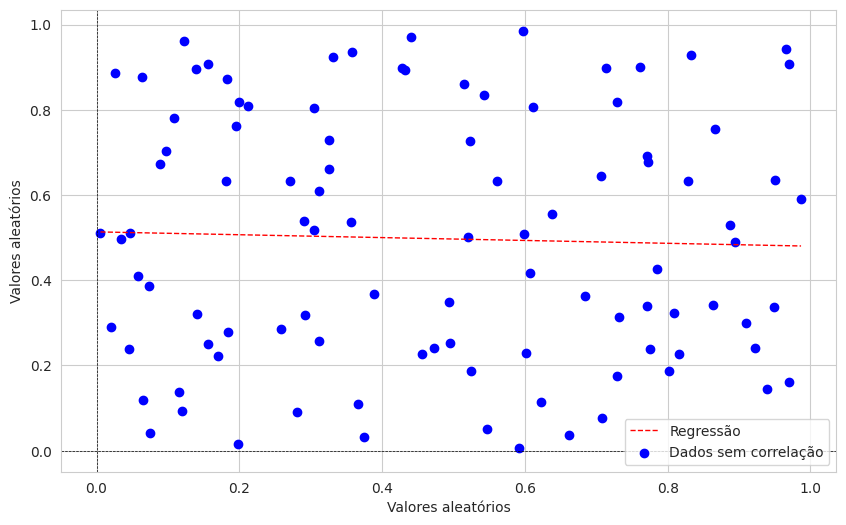

In [8]:
print(f'Valor do R² do treinamento: {lr.score(X_train, y_train)}')
print(f'Valor do R² do dataset de teste: {lr.score(X_test, y_test)}')
print(f'Valor do R² utilizando-se as predições do modelo: {lr.score(X_test, y_pred)}')

# Adequando valor da semente aleatória para fins de reproducibilidade
np.random.seed(42)
# Gerando X com valores aleatórios
X_rnd = np.random.rand(100, 1)
# Gerando y também aleatório e sem corelação com X
y_rnd = np.random.rand(100)
# Nova regressão
lr3 = LinearRegression()
lr3.fit(X_rnd, y_rnd)
print(f'Valor do R² de valores sem correlação: {lr3.score(X_rnd, y_rnd)}')

x_range = np.linspace(X_rnd.min(), X_rnd.max(), 10)
y_range = lr3.predict(x_range.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo X
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo Y

ax.plot(x_range, y_range, 'r--', linewidth=1, label=f'Regressão')
ax.scatter(X_rnd, y_rnd, color='blue', label='Dados sem correlação')
ax.legend()
ax.set_xlabel('Valores aleatórios')
ax.set_ylabel('Valores aleatórios')
fig.show()

print(f'a={lr3.intercept_.squeeze():.4f} \nb={lr3.coef_.squeeze():.4f}')
print(f'Equação da reta: y = {lr3.coef_.squeeze():.4f}x + {lr3.intercept_.squeeze():.4f}')
X_rnd.shape

Nota-se que os valores de $R^2$ variam conforme o dataset:

* Com os dados de treinamento, conseguimos uma excelente previsibilidade da variável dependente ($R^2=0.9645$)
* Com os dados de teste, ainda há uma boa previsibilidade, mas um pouco menor que a anterior ($R^2= 0.9024$)
* Utilizando-se as previsões dadas pela regressão, obtém-se um $R^2=1.0$ , já que estamos utilizando exatamente os valores esperados pela regressão.
* Porém, quando utilizamos valores aleatórios para as variáveis, obtemos um valor de $R^2$ próximo a zero ($R^2=0.0012$)

A biblioteca ```sklearn.metrics``` també oferece uma função que realiza o cálculo de $R^2$, conforme pode ser visto abaixo.

In [9]:
from sklearn.metrics import r2_score
y_pred_t = lr.predict(X_train)
print(f'R² do treinamento com sklearn.metrics.r2_score: {r2_score(y_train, y_pred_t)}')

R² do treinamento com sklearn.metrics.r2_score: 0.9645401573418146


## Outras métricas

A biblioteca ``` sklearn``` oferece outras métricas para avaliação da validade do modelo de regressão linear:

### Mean Squared Error (MSE)
É a média dos erros quadrados. É dada pela fórmula

$
MSE = \dfrac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n} \\
\text{onde:}\\
y_i \text{ - valores observados para a da variável dependente}\\
\hat{y}_i \text{ - valores previstospelo modelo}\\
n \text{ - número de data points}
$

Por ser uma soma de quadrados, seu valor é mais influenciado por valores cujas previsões se afastaram mais das observações, sendo assim, muito influenciado por outliers. Costumam ser valores grandes e quanto menor for esse valor, o modelo melhor representa a relação entra as variáveis.


### Root Mean Squared Error (RMSE)
Para facilitar a comparação com os valores do universo de observações, calcula-se a raiz quadrada do MSE

$
RMSE = \sqrt{MSE}
$

Desta forma, o valor do RMSE é de mesma grandeza dos valores observados.


### Mean Absolute Error (MAE)
A média dos erros absolutos, é semelhante ao MSE. Entretanto, ela é lida com os valores negativos da variação entre previsões e observações calculando o módulo desta diferença ao invés de elevar esta diferença ao quadrado

$
MAE = \dfrac{\sum_{i=1}^n|y_i-\hat{y}_i|}{n} \\
$

Assim, seus valores já são calculados com a mesma grandeza dos dados.

### Mean Absolute Percentage Error (MAPE)

Ao contrário das métricas anteriores, o MAPE retorna seus resultados em valores relativos, já ajustados ao universo das observações

$
\displaystyle
MAPE = \dfrac{1}{n}{\sum_{i=1}^n\dfrac{|y_i-\hat{y}_i|}{y_i}} \\
$


In [10]:
from sklearn import metrics

print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Mean Absolute Error (MAE): { metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, y_pred)} \
        \n\t ou seja, um erro médio de {metrics.mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%')

Mean Squared Error (MSE): 49830096.85590839
Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error: 0.07744880046205216         
	 ou seja, um erro médio de 7.74%


## Pressupostos da Regressão Linear

Antes de validar uma regressão linear completamente, devemos analisar se nosso dataset e o modelo treinado se encaixam, minimamente, nos pressupostos para que uma regressão linear seja eficiente na realização de previsões.

São os seguintes pressupostos que devem ser levados em conta para uma regressão linear simples:

### 1. Linearidade
Obviamente, uma regressão linear realizará previsões mais precisas quanto maior for a linearidade do dataset.

A mera visualização dos dados nos permite inferir sobre a linearidade dos dados.

Em alguns casos, a regressão linear pode representar a contento dados não lineares, mas quanto mais nos afastamos dos limites do dataset original, as previsões tendem a se tornar muito imprecisas.

O código abaixo simula situações de linearidade e não linearidade em datasets.

In [11]:
import math as mt
import random

# Criando dois toys datasets, um linear e outro não linear
X2 = np.random.rand(1, 100)*(mt.pi)
X2 = X2.reshape(-1, 1)
#introduzindo alguma desordem às ordenadas
y2_factor = (np.random.rand(1, len(X2))*2)-1
y2_factor = y2_factor.reshape(-1, 1)
# ordenadas não lineares
y_non_lin = (2*X2 + np.sin(X2)*6)+ y2_factor
# ordenadas lineares
random.shuffle(y2_factor)
y_lin = (2*X2 + 4) + y2_factor


X_lin_train,X_lin_test,y_lin_train,y_lin_test = train_test_split(X2,y_lin,test_size=.2,random_state=42)
X_non_train,X_non_test,y_non_train,y_non_test = train_test_split(X2,y_non_lin,test_size=.2,random_state=42)

lr_lin = LinearRegression()
lr_non_lin = LinearRegression()

lr_lin.fit(X_lin_train, y_lin_train)
lr_non_lin.fit(X_non_train, y_non_train)

y_lin_pred = lr_lin.predict(X_lin_test)
y_non_pred = lr_non_lin.predict(X_non_test)


Valor do R² do linear: 0.9093990108847276
Valor do R² do não linear: 0.4249923002554935


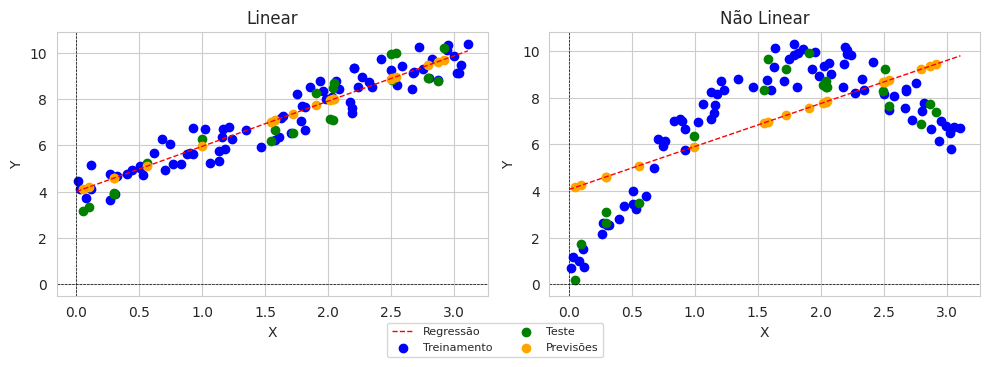

In [12]:
x_lin_range = np.linspace(0, X_lin_train.max(), 100)
y_lin_range = lr_lin.predict(x_lin_range.reshape(-1, 1))

x_non_range = np.linspace(0, X_non_train.max(), 100)
y_non_range = lr_non_lin.predict(x_non_range.reshape(-1, 1))


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo X
ax1.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo Y

ax1.plot(x_lin_range, y_lin_range, 'r--', linewidth=1, label=f'Regressão')
ax1.scatter(X_lin_train, y_lin_train, color='blue', label='Treinamento')
ax1.scatter(X_lin_test,y_lin_test, color='green', label="Teste")
ax1.scatter(X_lin_test, y_lin_pred, color='orange', label='Previsões')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Linear')

ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo X
ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Eixo Y

ax2.plot(x_non_range, y_non_range, 'r--', linewidth=1, label=f'Regressão')
ax2.scatter(X_non_train, y_non_train, color='blue', label='Treinamento')
ax2.scatter(X_non_test,y_non_test, color='green', label="Teste")
ax2.scatter(X_non_test, y_non_pred, color='orange', label='Previsões')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Não Linear')

# --- LEGENDAS ---
# Cria uma legenda única para a figura inteira
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Remove legendas duplicadas (se houver)
unique_labels = dict(zip(labels, handles))
fig.legend(unique_labels.values(), unique_labels.keys(),
           loc='lower center',   # Posição abaixo da figura
           bbox_to_anchor=(0.5, 0.08),  # Ajuste fino da posição
           ncol=2,              # Número de colunas (ajuste conforme necessário)
           fontsize=8)

# Ajusta o layout para dar espaço à legenda
fig.tight_layout(rect=[0, 0.1, 1, 1])  # rect=[left, bottom, right, top]

fig.show()

print(f'Valor do R² do linear: {lr_lin.score(X_lin_train, y_lin_train)}')
print(f'Valor do R² do não linear: {lr_non_lin.score(X_non_train, y_non_train)}')

### 2. Independência dos erros
Cada erro, ou a diferença entre o observado e o previsto, deve ser independendo dos demais. Isso significa que o valor de um erro não deve ter influência sobre os demais.

### 3. Homocedasticidade dos erros
O termo homocedasticidade identifica que possuem a mesma variancia. No caso específico da regressão line, para que o modelo seja adequado à previsões, é importante que os erros ocorridos entre as observações e as previsões obtidas possuam a mesma variância ao longo de toda a distribuição.

Isso pode ser constatado de diversas formas. A mais simples e visual é obtida pela criação de um gráfico onde as predições são colocadas como abscissas e os erros como ordenadas, conforme pode ser visto abaixo.

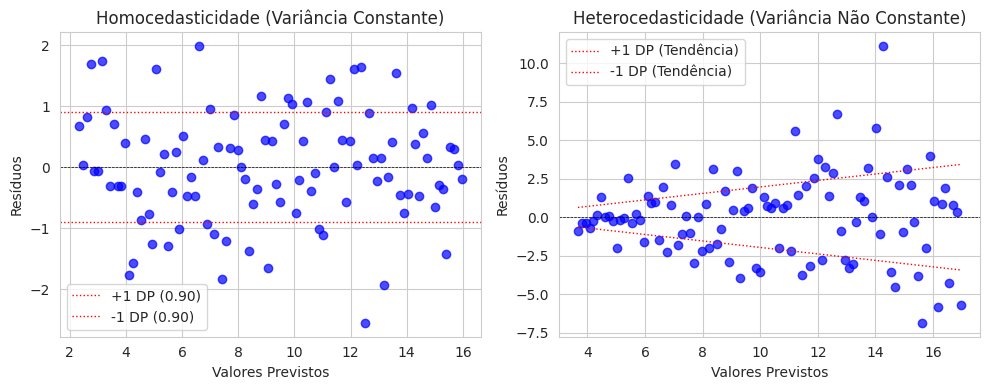

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Configuração dos dados
np.random.seed(42)
X_h = np.linspace(1, 10, 100)  # Variável independente

# Dados COM homocedasticidade (variância constante)
erro_com_h = np.random.normal(-1, 1, 100)  # Erro com média -1 e desvio padrão 1
y_com_h = 2 + 1.5 * X_h + erro_com_h

# Dados SEM homocedasticidade (variância proporcional a X)
erro_sem_h = np.random.normal(0, 0.5 * X_h, 100)  # Desvio padrão = 0.5 * X
y_sem_h = 2 + 1.5 * X_h + erro_sem_h

# Ajuste dos modelos
X_h = X_h.reshape(-1, 1)
y_com_h = y_com_h.reshape(-1, 1)
y_sem_h = y_sem_h.reshape(-1, 1)

lr_sem_h = LinearRegression()
lr_com_h = LinearRegression()

lr_sem_h.fit(X_h, y_sem_h)
lr_com_h.fit(X_h, y_com_h)

y_pred_sem = lr_sem_h.predict(X_h)
y_pred_com = lr_com_h.predict(X_h)

e_com_h = y_com_h - y_pred_com
e_sem_h = y_sem_h - y_pred_sem

# Cálculo dos desvios padrão dos resíduos
std_com_h = np.std(e_com_h)
std_sem_h = np.std(e_sem_h)

# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1: Homocedasticidade (variância constante)
ax1.scatter(y_pred_com, e_com_h, color='blue', alpha=0.7)
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax1.axhline(std_com_h, color='red', linewidth=1, linestyle=':', label=f'+1 DP ({std_com_h:.2f})')
ax1.axhline(-std_com_h, color='red', linewidth=1, linestyle=':', label=f'-1 DP ({std_com_h:.2f})')
ax1.set_xlabel('Valores Previstos')
ax1.set_ylabel('Resíduos')
ax1.set_title('Homocedasticidade (Variância Constante)')
ax1.legend()

# Subplot 2: Heterocedasticidade (variância não constante)
ax2.scatter(y_pred_sem, e_sem_h, color='blue', alpha=0.7)
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')

# 1. Calcular a tendência do desvio padrão (ajuste linear)
# Usaremos |resíduos| para modelar a variância
abs_residuos = np.abs(e_sem_h)
coeff = np.polyfit(y_pred_sem.flatten(), abs_residuos.flatten(), deg=1)
trend_line = np.poly1d(coeff)(y_pred_sem.flatten())

# 2. Plotar linhas de ±1 desvio padrão (tendência)
ax2.plot(y_pred_sem, trend_line, 'r:', linewidth=1, label='+1 DP (Tendência)')
ax2.plot(y_pred_sem, -trend_line, 'r:', linewidth=1, label='-1 DP (Tendência)')


ax2.set_xlabel('Valores Previstos')
ax2.set_ylabel('Resíduos')
ax2.set_title('Heterocedasticidade (Variância Não Constante)')
ax2.legend()

plt.tight_layout()
plt.show()


### 4. Normalidade na distribuição dos erros

Em uma regressão linear, pressupõe-se que os resíduos, ou erros, encontrados possuirão uma distribuição normal. Isso pode ser verificado utilizando-se testes estatísticos como o Kolmogorov-Smirnov, ou de forma gráfica, utilizando-se um gráfico Quantil-Quantil (Q-Q plot), por exemplo.

Abaixo vemos um exemplo de gráfico com e sem distribuição normal de resíduos:

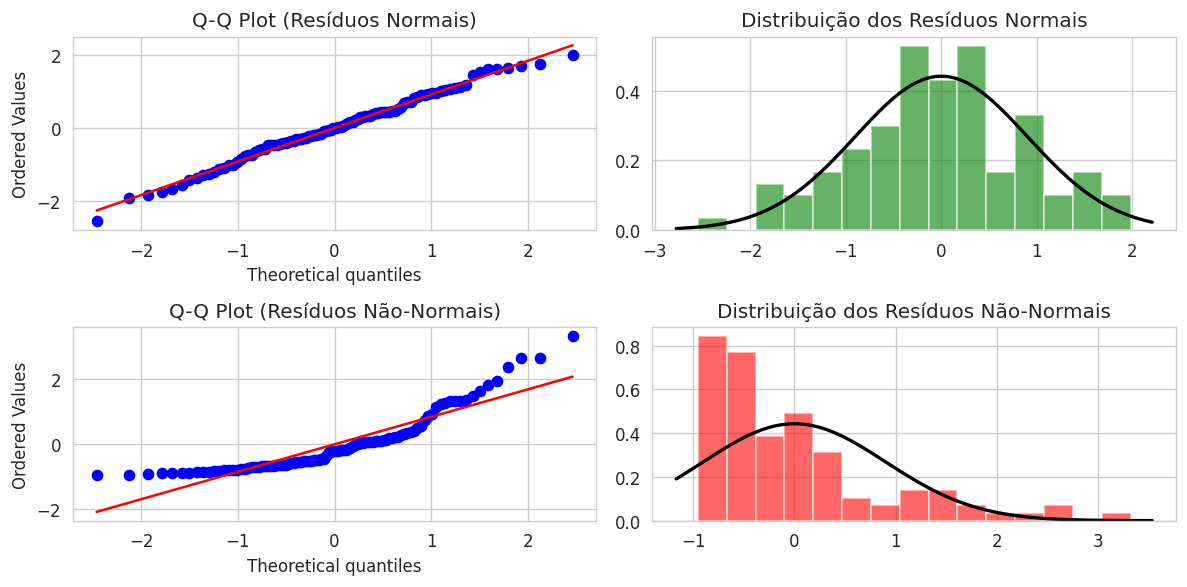

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Configuração para melhor qualidade dos gráficos
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

# Gerar dados com resíduos normais
np.random.seed(42)
X_N = np.linspace(0, 10, 100)
# Gerando dados com resíduos normais
y_norm = 2 * X_N + 1 + np.random.normal(0, 1, 100)

# Ajustar modelo de regressão linear
# Agora utilizando a função OLS da biblioteca statsmodels
X_with_const = sm.add_constant(X_N)
model_norm = sm.OLS(y_norm, X_with_const).fit()
residuos_norm = model_norm.resid

# Gerar dados com resíduos não-normais (exponenciais)
y_N_norm = 2 * X_N + 1 + np.random.exponential(1, 100) - 1

# Ajustar modelo de regressão linear
model_N_norm = sm.OLS(y_N_norm, X_with_const).fit()
residuos_N_norm = model_N_norm.resid


# Plotar gráfico Q-Q
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
stats.probplot(residuos_norm, dist="norm", plot=plt)
plt.title('Q-Q Plot (Resíduos Normais)')

# Resíduos normais
# Plotar distribuição dos resíduos
plt.subplot(2, 2, 2)
# Histograma dos resíduos normasis
plt.hist(residuos_norm, bins=15, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuos_norm), np.std(residuos_norm))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos Normais')

# Residuos não normais
# Plotar gráfico Q-Q
plt.subplot(2, 2, 3)
stats.probplot(residuos_N_norm, dist="norm", plot=plt)
plt.title('Q-Q Plot (Resíduos Não-Normais)')

# Plotar distribuição dos resíduos
plt.subplot(2, 2, 4)
plt.hist(residuos_N_norm, bins=15, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuos_N_norm), np.std(residuos_N_norm))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos Não-Normais')


plt.tight_layout()
plt.show()


## Como avaliar o modelo

Para verificar se nosso modelo é adequado, utilizamos gráficos e testes estatísticos. Para facilitar a análise da validade dos modelos ajustados, eu criei uma biblioteca contendo estes gráficos e alguns testes que podem ser úteis para avaliação de regressões lineares.

Ela encontra-se disponível [aqui](https://github.com/cfreis/machine_learning).

Existem diversas formas de se calcular regressões lineares, já que vários módulos apresentam esta função.

Vimos que em diversas partes do código até agora exibido, utiliza-se ```sklearn.linear_model import LinearRegression```.

Entretanto, a partir de agora, utilizaremos a regressão linear ```OSL``` do módulo  ```statsmodels.api```, uma vez que ela é mais flexível.

Para invocá-la utiliza-se:

In [15]:
# importa o módulo
import statsmodels.api as sm

'''
Adiciona uma coluna de valores constantes
à uma matriz de características ou features X
'''
X_with_const = sm.add_constant(X_N)
X_lin_const = sm.add_constant(X_lin_train)
X_h_const = sm.add_constant(X_h)
# cria modelos
model_norm = sm.OLS(y_norm, X_with_const).fit() #modelo com resíduos normais
model_N_norm = sm.OLS(y_N_norm, X_with_const).fit() #modelo com resíduos normais
model_lin = sm.OLS(y_lin_train, X_lin_const).fit() # Linear
model_non_lin = sm.OLS(y_non_train, X_non_train).fit() # não Linear
model_sem_h = sm.OLS(y_sem_h, X_h_const).fit() # Heterocedasticidade
model_com_h = sm.OLS(y_com_h, X_h_const).fit() # Homocedasticidade
lr_com_h.fit(X_h, y_com_h)
# extrai os resíduos
residuos_norm = model_norm.resid

In [16]:
# Adquirindo a biblioteca
import os
os.chdir('/content')
if not os.path.exists('regression_tests.py'):
        print(f"Regression_tests não encontrado. Baixando a bibloteca...")
        !wget -q https://raw.githubusercontent.com/cfreis/machine_learning/refs/heads/master/regression_tests.py  # -q = quiet (silencioso)
else:
  print(f"Tudo OK...")

Regression_tests não encontrado. Baixando a bibloteca...



Nela encontram-se disponibilizados os seguintes gráficos e testes:

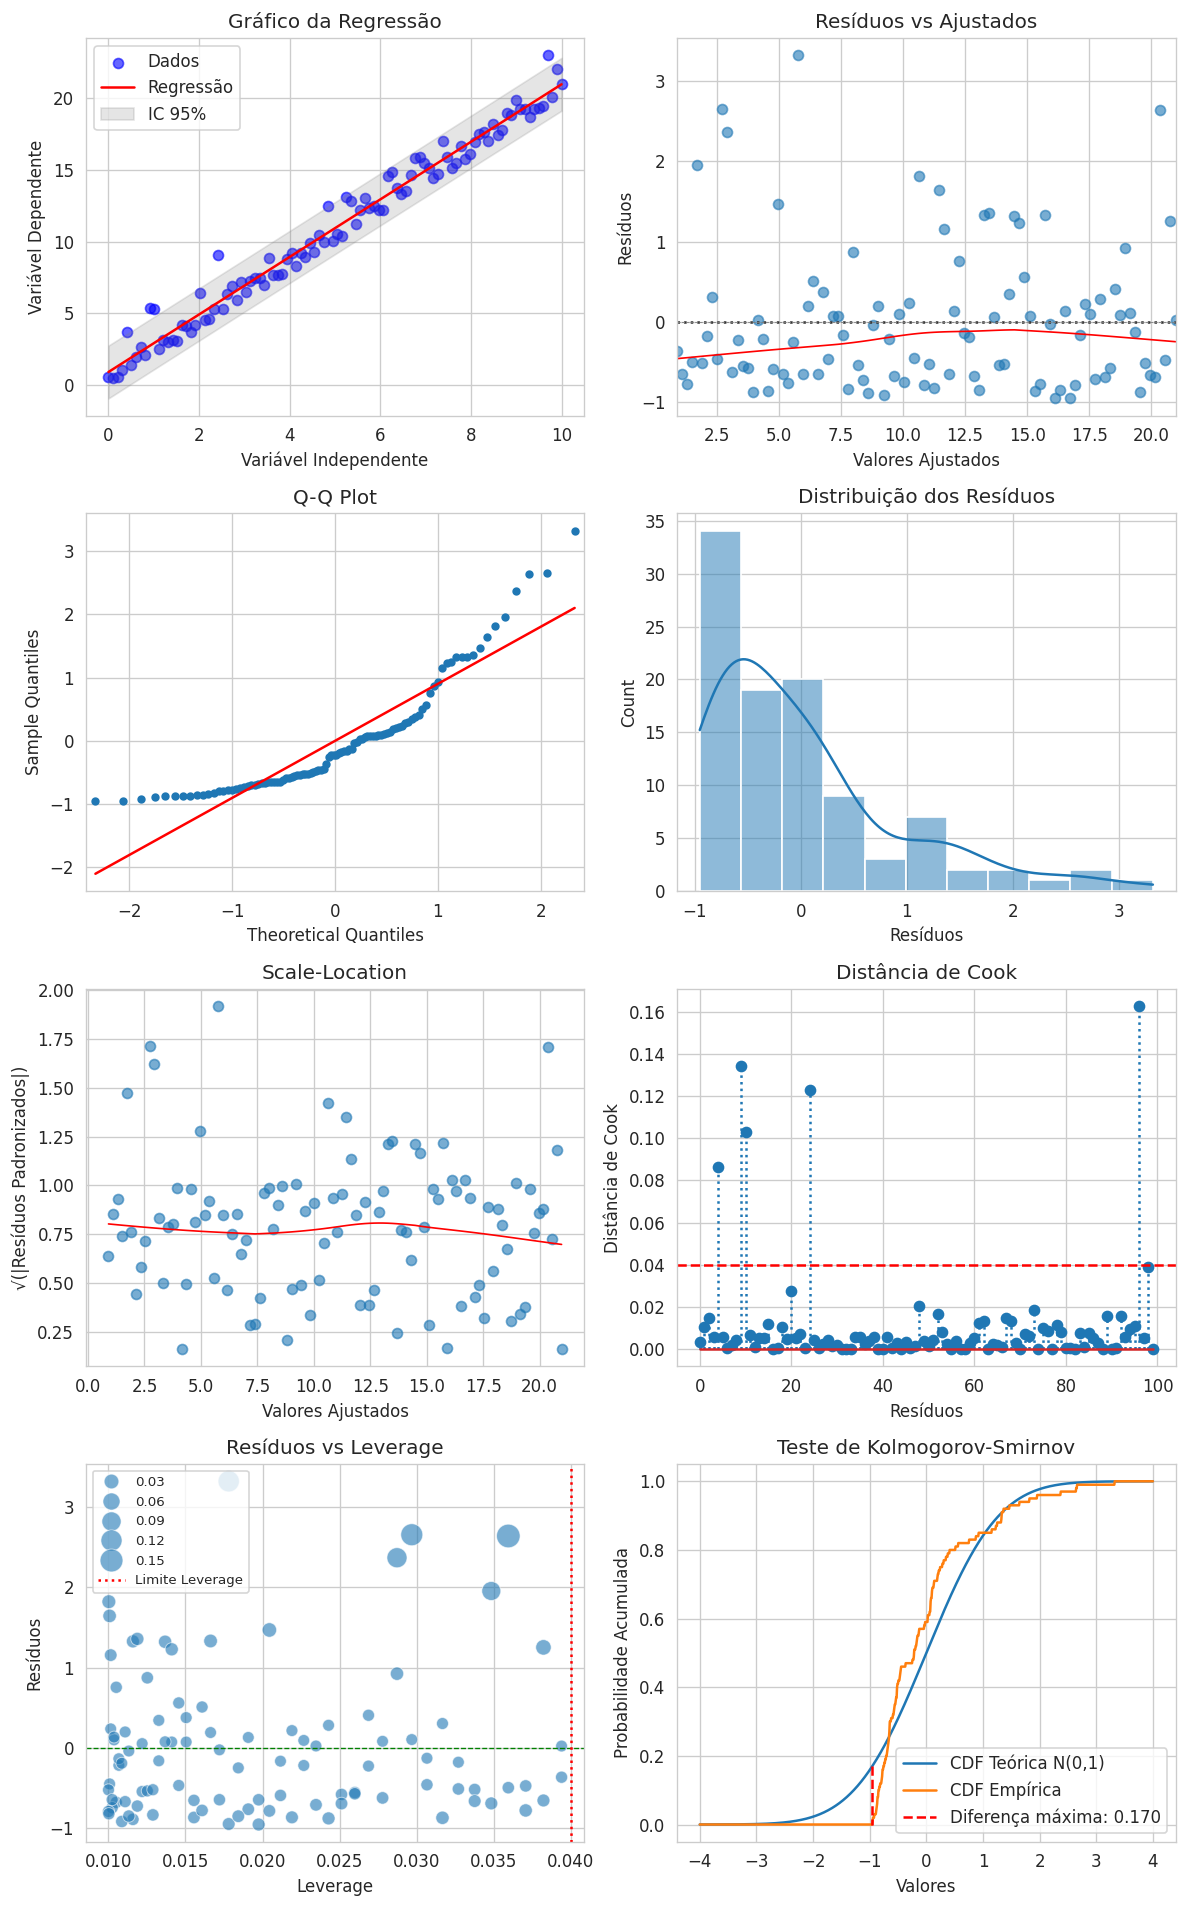

Valores críticos: [0.555 0.632 0.759 0.885 1.053]
Níveis de significância (%): [15.  10.   5.   2.5  1. ]


,Teste,Estatística,p-value,Valor_Referência,Resultado
0,Kolmogorov-Smirnov,0.1699,0.0054,p-valor=0.05,H0=Distr Normal -> Rejeitar
1,Shapiro-Wilk,0.8406,0.0000,p-valor=0.05,H0=Distr Normal -> Rejeitar
2,Anderson-Darling,4.9018,0.7590,Significancia=5.0%,H0=Distr Normal -> Rejeitar


In [23]:
import regression_tests as rt

rt.diagnostic_plots(model_N_norm, # modelo a ser analisado
                 plots=['regressao','residuos', 'qq', 'hist',  # Gráficos disponíveis
                        'scale', 'cook','leverage','KS'], # Default=todos
                 n_cols=2, # qtd de colunas no grid. Default=2
                 figsize=(0, 0)) # tamanho da figura. Default-(0,0)=automático



resultados = rt.test_residues(
                model=model_N_norm,                   # modelo a ser analisado
                tests=['KS', 'Shapiro', 'Anderson'],  # Testes a serem realizados. Default=todos
                alpha=0.05,                          # Nível de significância Default=0.05
                rigor=2,                             # Nível para Anderson-Darling. Qto maior mais rigoroso
                                                     # Níveis de significância: 0-15% 1-10% 2-5% 3-2.5% 4-1%
                                                     # Default-2 = 5%
                vprint=True                         # Imprimir detalhes. Default=False
)

display(resultados)

### Gráfico "Resíduos vs Ajustados"


O gráfico "Resíduos vs Valores Ajustados" auxilia a verificar diversos dos pressupostos de um modelo de regressão linear. Ele ajuda a identificar:

* Homocedasticidade
* Padrões não-lineares nos resíduos
* Outliers ou pontos influentes

#### Como Interpretar o Gráfico
***1) Homocedasticidade***

Os resíduos devem estar aleatoriamente dispersos em torno da linha horizontal do zero, sem padrões ou tendências claras.

**Não deve conter** padrões em formato de "funil", o que indica que a  dispersão aumenta ou diminui juntamente com os valores ajustados. Isso indica que a variância dos erros não é constante, havendo, assim, **Heterocedasticidade**.

***2) Não-Linearidade***

Padrões curvos ou sistemáticos, como em forma de "U" ou de "onda", indicam que o modelo não capturou uma relação não-linear.

***3) Outliers e Pontos Influentes***

Pontos muito distantes da linha zero, que estejam acima de ±3 desvios padrão podem distorcer o modelo.

***4) Linha LOWESS no Gráfico***

A linha vermelha, indicativa do lowess mostra a tendência local dos resíduos. Desta forma, se ela segue horizontalmente e próximo a zero é um bom indicativo.

Caso ela seja curva ou inclinada, indica problemas de não-linearidade ou heterocedasticidade.

Compare os gráficos contendo modelos com resíduos

Distribuição Linear


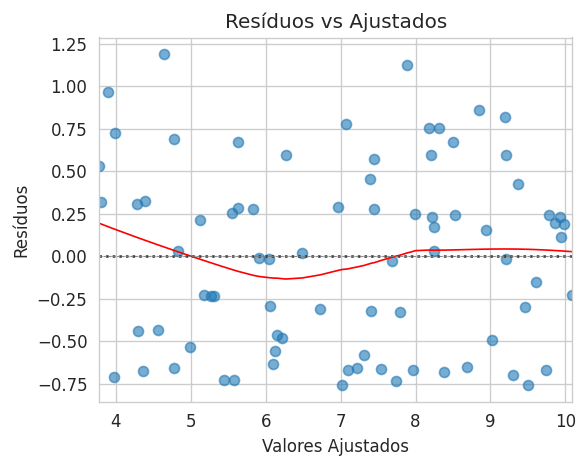

In [18]:
print('Distribuição Linear')
rt.diagnostic_plots(model_lin,['residuos'])


Distribuição Não Linear - Formato de meia_lua


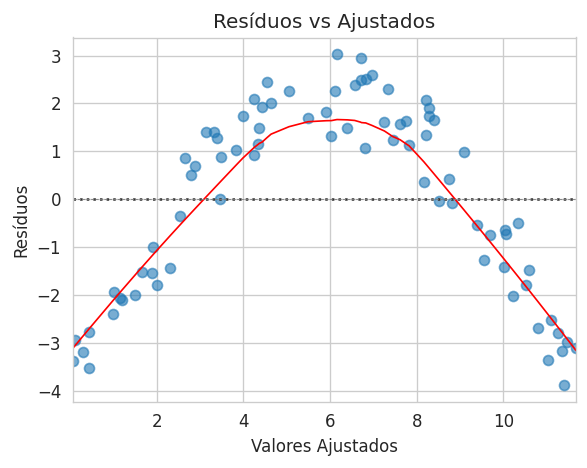

In [19]:
print('\nDistribuição Não Linear - Formato de meia_lua')
rt.diagnostic_plots(model_non_lin,['residuos'])


Homocedasticidade


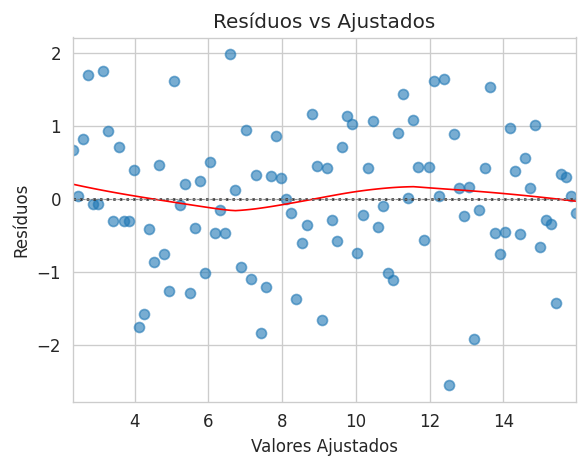

In [20]:
print('\nHomocedasticidade')
rt.diagnostic_plots(model_com_h,['residuos'])


Heterocedasticidade - Resíduos em funil


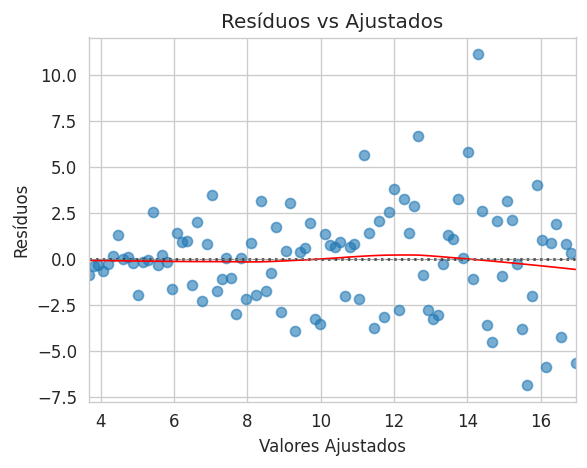

In [21]:
print('\nHeterocedasticidade - Resíduos em funil')
rt.diagnostic_plots(model_sem_h,['residuos'])

### Gráfico Q-Q (Quantil-Quantil)
O gráfico Q-Q (Quantil-Quantil) é uma ferramenta essencial para verificar se os resíduos de um modelo de regressão seguem uma distribuição normal.

Nele podemos ver:
* Eixo X - Quantis teóricos da distribuição normal. Mostra o que seria esperado se os resíduos fossem perfeitamente normais.

* Eixo Y - Quantis dos resíduos observados, oriundos do dataset..

* Linha "S" - é a linha de referência que representa a distribuição normal ideal.

Neste gráfico verificamos se os resíduos se alinham à linha teórica, idicando que seguem uma distribuição normal. Quanto mais os pontos se afastam da linha "S" menor será a sua normalidade.

**Resumo das Interpretações:**

|Padrão|	Problema|	Solução|
|---|---|---|
|Pontos alinhados em "S"| Nenhum|	Nenhuma ação|
|Caudas acima ou abaixo|	Curtose (caudas pesadas)|	Transformar y em log(y)|
|Curva acima ou abaixo|	Assimetria|	Usar np.sqrt(y) ou np.log1p(y) -> log(1+y)|
|Padrão em "S" ou "U"|	Não-normalidade|	Verificar outliers ou usar modelos robustos|

Se o Q-Q Plot mostrar não-normalidade, verifique se o histograma dos resíduos támbem apresenta essa característica.




Resíduos Normais


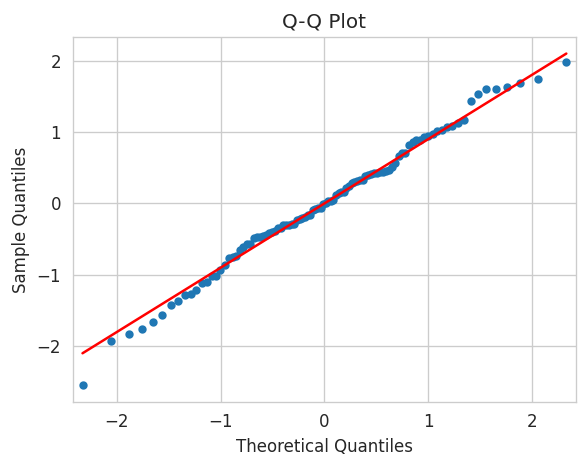

In [22]:
print('\nResíduos Normais')
rt.diagnostic_plots(model_norm,['qq'])


Resíduos Não Normais


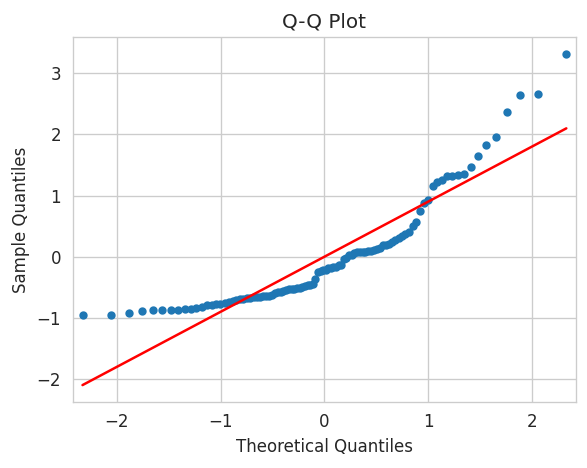

In [23]:
print('\nResíduos Não Normais')
rt.diagnostic_plots(model_N_norm,['qq'])

### Gráfigo de distribuição dos resíduos
Esse gráfico cria um histograma com as distribuições dos resíduos e os compara com uma curva normal teórica. Quanto mais prõximo à curva o histograma estiver, mais a distribuições de resíduos tendem à normalidade.

Abaixo, dois exemplos, com resíduos distribuídos normalmente e outro com distribuição diferente da normal.


Resíduos Normais


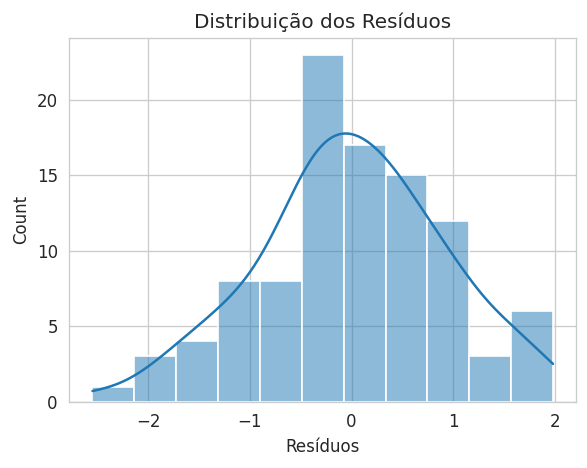

In [24]:
print('\nResíduos Normais')
rt.diagnostic_plots(model_norm,['hist'])


Resíduos Não Normais


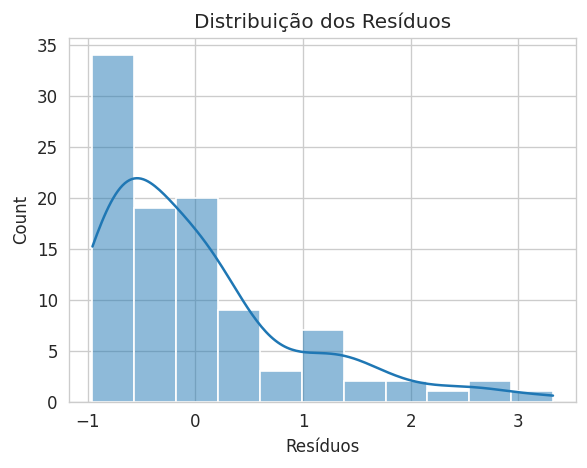

In [25]:
print('\nResíduos Não Normais')
rt.diagnostic_plots(model_N_norm,['hist'])

### Gráfico Scale-Location

O gráfico Scale-Location, também chamado de Spread-Location, também é utilizado na verificação da homocedasticidade, ou a variância constante dos resíduos, complementarmente ao gráfico de resíduos vs. ajustados. Nele vemos nas abscissas os valores preditos pelo modelo e nas ordenadas a raiz quadrada valores absolutos dos resíduos padronizados.

Com ele podemos interpretar tanto a Homocedasticidade, quanto a Linearidade do modelo.

#### 1. Homocedasticidade
Espera-se ver a linha LOWESS, em vermelho, sem tendência clara e uma dispersão uniforme dos pontos ao longo de todos os valores ajustados.

Caso a linha LOWESS apresente padrões ascendentes, descendente, ou, ainda, apresente uma dispersão onde os pontos aumentam ou diminuem em seus valores ajustados, é indício de Heterocedasticidade.

#### 2. Padrões Não-Lineares
Neste caso, a linha LOWESS aparecerá com curvas ou ondulações, indicando que os dados analisados possuem alguma relação não-linear.

**Resumo das interpretações**

|Padrão no Gráfico	|Problema	|Solução|
|---|---|---|
|Linha horizontal	|Nenhum	|Nenhuma ação necessária|.
|Linha ascendente ou descendente|	Heterocedasticidade	|Transformar y  em log(y) ou usar WLS|
|Linha curva|	Não-linearidade	|Adicionar termos polinomiais|



Resíduos com Homocedasticidade 


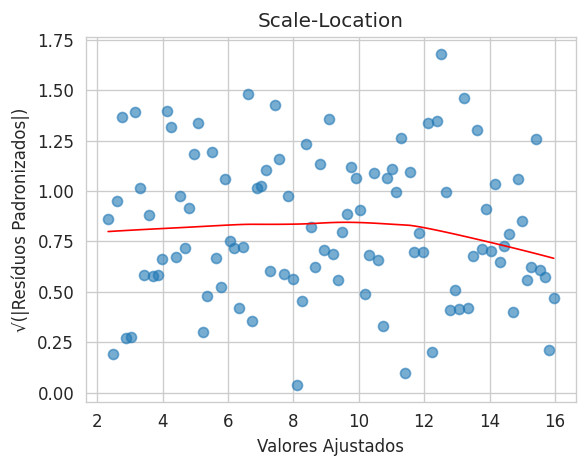

In [26]:
print('\nResíduos com Homocedasticidade ')
rt.diagnostic_plots(model_com_h,['scale'])


Resíduos com Heterocedasticidade 


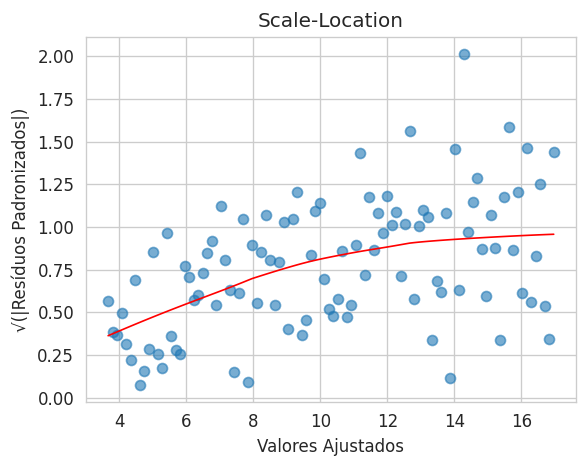

In [27]:
print('\nResíduos com Heterocedasticidade ')
rt.diagnostic_plots(model_sem_h,['scale'])


Dados Lineares


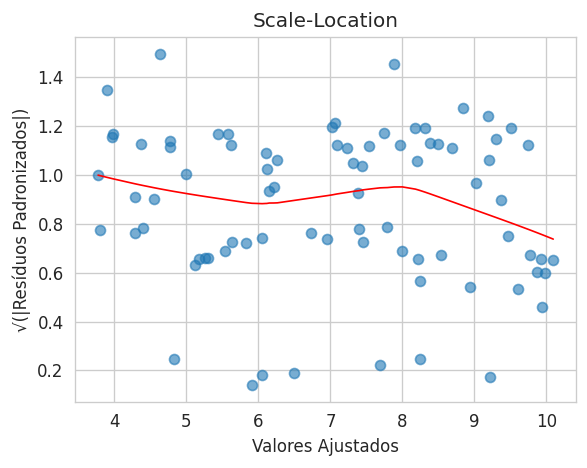

In [28]:
print('\nDados Lineares')
rt.diagnostic_plots(model_lin,['scale'])


Dados Não Lineares


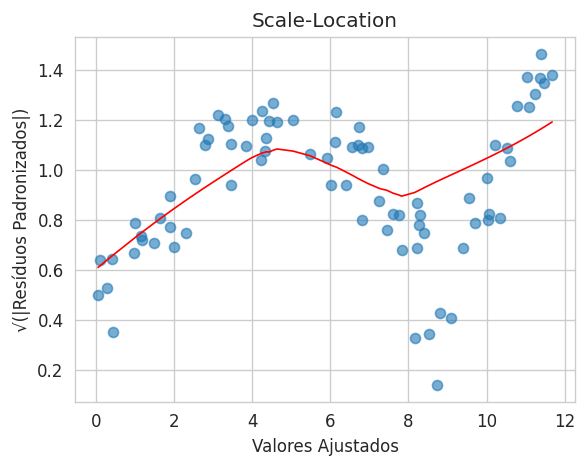

In [29]:
print('\nDados Não Lineares')
rt.diagnostic_plots(model_non_lin,['scale'])

### Gráfico Distância de Cook

A Distância de Cook é uma métrica estatística utilizada para identificar observações que possuem grande influência em um modelo de regressão. Ela mede o quanto os resultados da regressão mudariam se uma observação específica fosse removida do conjunto de dados.

É dada pela fórmula

$
D_i = \dfrac{(\mathbf{\hat{y}} - \mathbf{\hat{y}_{(i)}})^\top (\mathbf{\hat{y}} - \mathbf{\hat{y}_{(i)}})}{p \times \mathrm{MSE}}\\ \\
\text{onde}\\ \\
\hat{y} \text{ - valores previstos usando todas as observações}\\
\hat{y}_{(i)} \text{ - valores previstos sem a i-ésima observação}\\
p \text{ - número de parâmetros do modelo}\\
MSE \text{ - erro quadrático médio do modelo completo}\\
$

Valores altos de Distância de Cook indicam pontos que têm grande influência nos coeficientes da regressão.

Como regra práticapode-se considerar

* $D_i > 1$ - ponto potencialmente influente;
* $D_i > 4/n$ - onde n é o número de observações, indica um ponto que merece investigação.

A Distância de Cook é particularmente útil para:
* Identificar pontos que distorcem significativamente o modelo
* Verificar a robustez dos resultados da regressão
* Decidir se determinadas observações devem ser removidas ou investigadas

Porém a remoção de pontos influentes deve ser feita com cautela e com uma justificativa teórica adequada.

No gráfico abaixo, o eixo dos "X" repreesentam os resíduos e o eixo dos "Y" as distâncias de Cook. A linha vermelha tracejada indica o limiar de referência de $\dfrac{4}{n}$ ,  valor crítico usado para sinalizar quais pontos podem estar afetando desproporcionalmente o modelo de regressão.

Assim, pontos acima da linha vermelha podem ser considerados potencialmente influentes e merecem investigação.



Dados Não Lineares


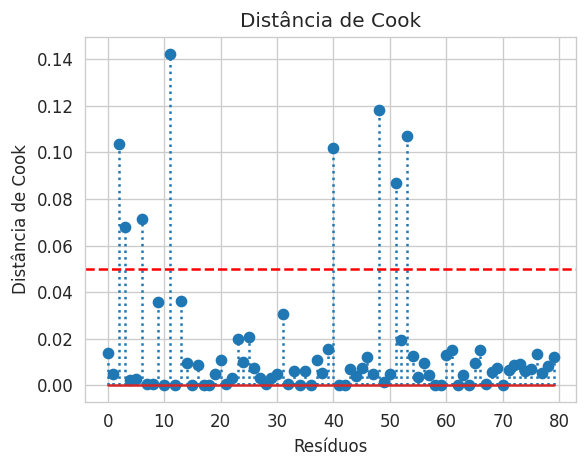

In [30]:
print('\nDados Não Lineares')
rt.diagnostic_plots(model_non_lin,['cook'])

### Gráfico Resíduos vs. Leverage
O gráfico Resíduos vs. Leverage, também chamado de Leverage Plot, realiza o diagnóstico de pontos de alavanca.

Entende-se por pontos de alavancagem aquelas observações que influenciam desproporcionalmente o ajuste do modelo. Junto com o gráfico de Cook, é uma  forma de de avaliar a relevância de uma dada observação.

Com ele é possível, dentre outras coisas, avaliar outliers influentes que tem o potencial de distorcer o modelo. Estes podem ser identificados como pontos que combinam alta alavancagem e grandes resíduos.

No gráfico o eixo "X" exibe a Leverage, variando entre 0 e 1, e mede o quanto uma observação influencia o ajuste do modelo. No eixo "Y" são exibidos os resíduos. O tamanho dos pontos	é proporcional à Distância de Cook (quanto maior, mais influente). A linha verde horizontal, posicionada no zero das ordenadas, marca a referência para resíduos neutros e a linha vertical vermelha, o limite de leverage, dado por

$
\dfrac{2\times k}{n}\\
\text{onde} \\
k \text{ - nº de parâmetros; e} \\
n \text{ - nº de observações}
$

Observações com leverage acima desse limite são consideradas pontos de alta alavancagem e devem ser investigadas.

Assim, podemos analisar o gráfico da seguinte forma:

| Resíduos | Leverage | Interpretação|
|---|---|---|
|Próximos de zero| Abaixo do limite| Pontos ordinários e de baixa influência|
|Pequenos ou moderados| Acima do limite|Podem influenciar a regressão, <br>mas não são necessariamente ruins
|Grandes,  positivos ou negativos| Acima do limite| Outliers Influentes e perigosos|
|Grandes| Baixa| Outliers com baixa alavancagem, <br> que afetam pouco o modelo|
|Pequeno| Alta| Desejáveis, pois enriquecem o modelo|

Além disso, pontos com alta Distância de Cook podem distorcer o modelo significativamente e devem ser investigados.

Embora não seja uma norma, tendo assim suas limitações, o esquema abaixo ajuda a identificar pontos problemáticos e validar a robustez do seu modelo.

<center><img src="https://drive.google.com/uc?export=download&id=1_74wyxj4SkqPx7E17x11bwaagM1d8-C8" width="400">
</center>



Dados Lineares


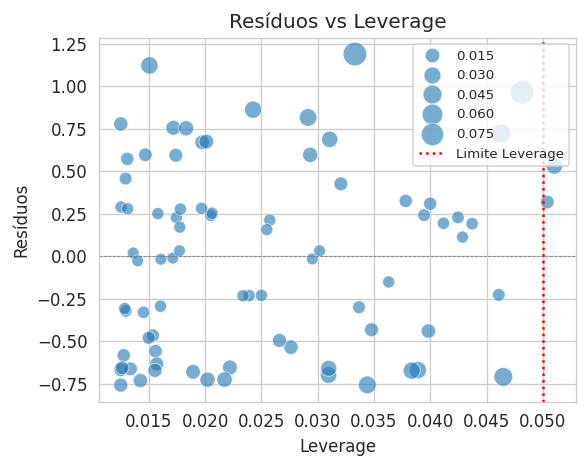

In [31]:
print('\nDados Lineares')
rt.diagnostic_plots(model_lin,['leverage'])


Dados Não Lineares


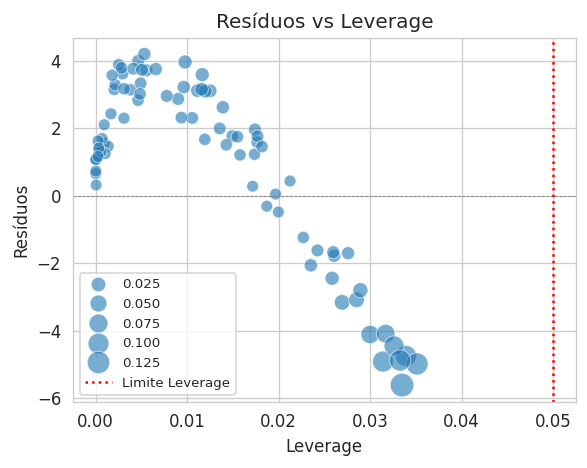

In [32]:
print('\nDados Não Lineares')
rt.diagnostic_plots(model_non_lin,['leverage'])

### Gráfico do Teste de Kolmogorov-Smirnov

Este gráfico traz um feedback visual para o teste de Kolmogorov-Smirnov, que compara duas distribuições distintas a fim de verificar suas semelhanças.

Aqui ele é utilizado em comparação com uma distribuição normal, a fim de constatar a normalidade da distribuição dos resíduos.


Dados Normais


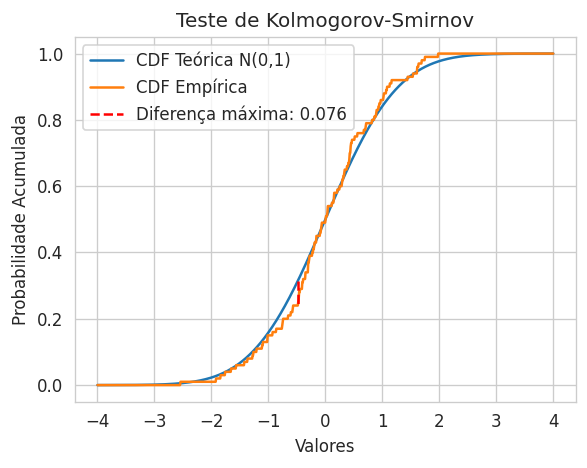

In [33]:
print('\nDados Normais')
rt.diagnostic_plots(model_norm,['KS'])


Dados Não Normais


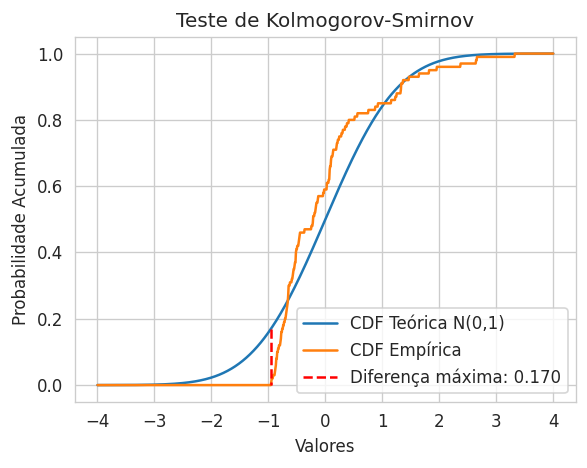

In [34]:
print('\nDados Não Normais')
rt.diagnostic_plots(model_N_norm,['KS'])

### Testes estatísticos do módulo ```regression_tests```

A normalidade da distribuição dos resíduos também pode ser testada utilizando-se testes estatísticos. No módulo ```regression_tests``` são disponibilizados os três testes de normalidade mais comuns: Shapiro-Wilk, Anderson-Darling e Kolmogorov-Smirnov.

Cada teste tem suas vantagens, desvantagens e aplicabilidade que podem ser assim resumidas:

|Critério|Shapiro-Wilk (SW)|Anderson-Darling (AD)|Kolmogorov-Smirnov (KS)|
|---|---|---|---|
|Principal Uso|Específico para normalidade|Normalidade e outras distribuições|Qualquer distribuição|
|Tamanho de Amostra|Melhor para n ≤ 50|Bom para n > 50|Qualquer tamanho|
|Sensibilidade|Alta no centro da distribuição|Alta nas caudas da distribuição|Baixa, melhor no centro|
|Robustez a Outliers|Sensível|Moderadamente robusto|Pouco robusto|
|Valores Repetidos (Ties)|Indiferente|Melhor que o KS|Sensível a ties|
|Complexidade|Cálculo mais complexo|Moderadamente complexo|Simples|
|Recomendação|Pequenas amostras|Grandes amostras|Comparações diversas|

O módulo, além de realizar os testes, também traz um sumário das suas interpretações, onde é apresentada a hipótese nula (H0) e se ela será rejetada ou não. Por exemplo, para uma H0 de distribuição normal, não rejeitá-la significa partir do presuposto que a H0 é verdadeira, ou em outras palavras, que a distribuição apresentada é normal.  

In [35]:
print('Distribuição Normal')
resultados = rt.test_residues(
                model=model_norm,                   # modelo a ser analisado
                tests=['KS', 'Shapiro', 'Anderson'],  # Testes a serem realizados. Default=todos
                alpha=0.05,                          # Nível de significância Default=0.05
                rigor=2,                             # Nível para Anderson-Darling. Qto maior mais rigoroso
                                                     # Níveis de significância: 0-15% 1-10% 2-5% 3-2.5% 4-1%
                                                     # Default-2 = 5%
                vprint=False                         # Imprimir detalhes. Default=False
)

display(resultados)

Distribuição Normal


,Teste,Estatística,p-value,Valor_Referência,Resultado
0,Kolmogorov-Smirnov,0.0758,0.5874,p-valor=0.05,H0=Distr Normal -> Não rejeitar
1,Shapiro-Wilk,0.9916,0.7928,p-valor=0.05,H0=Distr Normal -> Não rejeitar
2,Anderson-Darling,0.2159,0.7590,Significancia=5.0%,H0=Distr Normal -> Não rejeitar


In [36]:
print('Distribuição Não Normal')
resultados = rt.test_residues(
                model=model_N_norm,
                alpha=0.03,
                rigor=3,
                vprint=True
)

display(resultados)

Distribuição Não Normal
Valores críticos: [0.555 0.632 0.759 0.885 1.053]
Níveis de significância (%): [15.  10.   5.   2.5  1. ]


,Teste,Estatística,p-value,Valor_Referência,Resultado
0,Kolmogorov-Smirnov,0.1699,0.0054,p-valor=0.03,H0=Distr Normal -> Rejeitar
1,Shapiro-Wilk,0.8406,0.0000,p-valor=0.03,H0=Distr Normal -> Rejeitar
2,Anderson-Darling,4.9018,0.8850,Significancia=2.5%,H0=Distr Normal -> Rejeitar


## Outras formas de avaliação - modelo OSL

Quando implementada a regressão linear com a classe OSL (Ordinary Least Squares) da biblioteca statmodels, ficam disponíveis uma série de informações e estatísticas do modelo treinado, que podem ser acessados utilizando-se o método ```summary()```, conforme pode ser visto abaixo.

In [37]:
import statsmodels.api as sm

X_stat = sm.add_constant(X_h)
regsummary = sm.OLS(y_com_h, X_stat).fit()
print(regsummary.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1902.
Date:                Thu, 15 May 2025   Prob (F-statistic):           5.49e-66
Time:                        15:55:54   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8119      0.212      3.834      0.0

Nele encontramos as informações abaixo descritas e suas interpretações:

### Informações ordinárias
* Dep. Variable - lista o nome da variável dependente apresentada.
* Model e Method - lista o modelo e método utilizado na regressão.
* Date e Time - data e hora da criação do modelo.
* No. Observations - Numero de observações utilizadas no treinamento do modelo.





### Df Residuals
Representa os graus de liberdade que o modelo possui. É calculado como sendo

$
df = n-k-1\\
\text{onde}\\
n \text{ - número de observações}\\
k \text{ - número de variaveis independentes ou previsoras}
$

No exemplo acima

$
n=100\\
k=1\\
df = 100 -1 -1 =98
$

### Df model
É o número de variáveis previsoras utilizadas no modelo

### Covariance Type
O modelo aceita como estimadores de variancia  'nonrobust', 'HC0', 'HC1', 'HC2', 'HC3'. As variancias consideradas mais robustas ( 'HC0', 'HC1', 'HC2', 'HC3') tenta minizar ou até mesmo eliminar variáveis que apresentem covariancia.
O método 'nonrobust' parte do pressuposto que os dados apresentados possuem homocedasticidade de resíduos.

### R-squared
É o valor do $R^2$ encontrado nos dados de treinamento. Conforme já visto, ele informa o quanto a variável independente explica o comportamento da variável dependente. Valores próximos a 1 informam uma grande correlação entre essas variáveis.

### Adjusted R-squared
Uma das característica do $R^2$ é que ele nunca diminue quando acrescenta-se novas variáveis ao modelo. Desta forma, modelos com multiplas variáveis independentes podem parecer, erroneamente melhores após a introdução de novos preditores. O $R^2$ ajustado penaliza o calculo de $R^2$ baseado no numero de variáveis, melhorando a estimativa quando se utiliza regressões lineares multivariadas.

### F-statistic e Prob (F-statistic)
F-statistic mede se pelo menos uma das variáveis independentes (X) tem um efeito estatisticamente significativo na variável dependente (Y).

Isso é realizado atribuindo a cada variável preditora o valor zero e verificando se isso altera significativamento o valor da predição. Em outras palavras, para uma regressão simples, ele compara o modelo ajustado com um modelo "nulo", onde só existe o valor do intercept

$
y = \alpha
$

Assim, um F-statistic alto sugere que o modelo é significativamente melhor que um modelo sem preditores. Sendo a hipótese nula um modelo onde $\beta=0$, quanto maior o valor de F-statistic, mais evidências existem contra esta hipótese.

Já o Prob(F-statistic) ($P(F)$) é o p-valor associado à F-statistic.
Ele indica a probabilidade de se observar um F-statistic extremo caso a hipótese nula se confirme.

Desta forma:
* Se $P(F) \leq \alpha$ -  rejeita-se H0 e conclui-se que o modelo é estatisticamente significativo. Ou seja, pelo menos uma variável X afeta Y.
* Se $P(F) > \alpha$ - aceita-se H0 e conclui-se que o modelo não é melhor que um modelo sem preditores.


### AIC e BIC?
O AIC (Critério de Informação de Akaike) e o BIC (Critério de Informação Bayesiano) são métricas usadas para comparar modelos estatísticos e selecionar aquele que melhor equilibra ajuste e simplicidade.

Ambos penalizam modelos com muitos parâmetros, evitando assim complexidades desnecessárias, mas diferem na severidade da penalização, sendo o BIC o mais rigoroso.

Em ambos os casos, quanto menor o valor reportado, melhor o modelo.


### Análise de coeficientes
Na segunda seção dos resultados da regressão OLS, encontraremos os dados relativos aos coeficientes da regressão.

<center><img src="https://drive.google.com/uc?export=download&id=18zxOb7JpN2VcmB1MfjnfhK9LeTrY618Q" width="700">
</center>


#### Primeira coluna
Na primeira coluna identifica as linhas com os valores para $\alpha$ e dos coeficientes $\beta$ de cada uma das variáveis independentes do modelo.

* **Constante ou intercept** - identifica a linha contendo o valor de $\alpha$ do modelo linear.
* $x_i$ - identifica as linhas contendo os valores de $\beta_i$ de cada uma das variáveis independentes. Como aqui, estamos trabalahndo com uma regressão linear simples, há apenas uma variavel preditora. Logo, teremos apenas a linha $x_1$.

#### Coluna "coef"
Indica o valor dos coeficientes de cada uma das variáveis do modelo.
* O valor da linha ```const``` - corresponde ao valor de $\alpha$ ou intercept encontrado no modelo.
É o resultado obtido caso todas as variáveis independentes fossem transformadas em zeros. Támbém pode ser definido como sendo o ponto onde a reta da regressão encontra o eixo das ordenadas.

* Os valores das linhas $x_i$ - corresponde ao valor da variável $\beta_i$ no modelo. No caso de uma regressão linear simples, corresponde ao slope ou inclinação da reta.
Representa o peso de cada uma das variáveis preditoras possui sobre as alterações encontradas na variável predita.
Valores positivos indicam uma relação diretamente proporcional e valores negativos uma relação inversamente proporcional.
Em uma regressão simples, ele indicará o quanto a variável dependente variará quando a variável independente for incrementada em uma unidade.

#### Std err
Representa o erro padrão e é uma estimativa de desvio padrão que o coeficiente poderia assumir, baseado na variação dos coeficientes dentro dos data points.

Assim, ele representa a incerteza associada à estimativa de cada coeficiente, sendo que valores menores indicam uma melhor estimativa do coeficiente.

Entretanto, devemos lembrar que estes valores não podem ser tomados de forma absoluta, já que possuem a mesma grandeza dos dados. Por exemplo, um coeficiente de valor 10 pode ser melhor que um coeficiente de valor 1, caso o universo da variável dependente do primeiro caso varie entre zero e um milhão e o do segunda caso varie entre zero e um.

#### Valor "t"
A coluna ```t``` é uma estatística que mede a significância de cada coeficiente na regressão. Ela mede quantos erros padrão (std err) o coeficiente está distante de zero, indicando o seu efeito na variável independente.

É dado por

$t=\dfrac{coef}{std\ err}$

Quanto maior o ```t``` maior será a significância do coeficiente no modelo.

#### Valor P>|t|

É a probabilidade de se obter um valor de estatística de mesma magnitude do valor absoluto de ```t``` assumindo-se que o coeficiente em questão é igual a zero ($H0$).

$
P>|t| = P\left( |T|\ge |t_{obs}| \ \ \ \Big|\  H_0  :\beta_i = 0\right)\\
\text{onde}\\
T \text{- variável com distribuição }t \text{ de Student sob }H_0\\
t_{obs}\text{ - estatística }t\text{ observada no seu modelo (p.ex. }t = 43.607 \text{ para }x_1).\\
H_0:\beta = 0 \text{ - hipótese nula, onde } \beta =0
​$

Assim, podemos interpretar o valor de $P>|t|$
* $P>|t| \le 0.05$ - rejeitamos $H_0$, já que o coeficiente é estatisticamente significativo, havendo evidências de um efeito real.
* $P>|t| > 0.05$: Não rejeitamos $H_0$, já que o efeito pode ser fruto do acaso.

#### Colunas [0.025 e 0.975]
Representa os valores do intervalo de confiança de 95% da amostra. Valores abaixo do valor da primeira coluna, ou acima do valor da segunda coluna podem ser considerados outliers.

### Outros testes
A terceira seção dos resultados da regressão OLS traz os dados relativos alguns outros testes que a classe OSL realiza.

<center><img src="https://drive.google.com/uc?export=download&id=1MEr91a_EuePIaR8-doBDXlAIgETPES7v" width="700">
</center>



#### Omnibus
 O Teste Omnibus de D'Agostino verifica se a distribuição dos resíduos da regressão tem distribuiçaõ normal tomando como base a assimetria (skewness) e a curtose (kurotsis) de tal distribuição.

 $
 Omnibus=Z_1^2+Z_2^2\\
 \text{onde}\\
 Z_1 \text{ - escore padronizado de assimetria}\\
 Z_2 \text{ - escore padronizado da curtose}
 $

 O teste toma como $H_0$ aq hipótese onde os resíduos são normalmente distribuídos.

#### Prob(Omnibus)
Representa o p-valor associado ao teste Omnibus.

Como a $H_0$ do teste admite resíduos normalmente distribuídos, adorameos a seguinte interpretação:

* $Prob(Omnibus)\le 0.05$ - rejeita-se $H_0$ já que os resíduos não são normais.
* $Prob(Omnibus) > 0.05$ - aceita-se $H_0$ já que não há evidências para rejeitá-la.

Assim, um bom resultado será $Prob(Omnibus) > 0.05$, o que indica uma distribuição normal de resíduos.

#### Skew
Mede o grau da assimetria da distribuição dos resíduos.

Seus valores podem ser, de uma maneira geral:

* $Skew=0$ - distribuição perfeitamente simétrica;
* $Skew > 0$ - cauda à direita mais longa, apresentando assimetria positiva;
* $Skew < 0$ - cauda à esquerda mais longa, apresentando assimetria negativa.

<center><img src="https://drive.google.com/uc?export=download&id=1ZjY4GmqRvqtzeqNt20AkI54imGmI6HUc" width="500">
</center>


#### Kurtosis
A curtose mede achatamentos ou picos apresentados da distribuição dos resíduos.

Seus valores podem ser avaliados da seguinte forma:
* $Kurtosis = 3$ - curtose idêntica à normal, ou mesocúrtica.
* $Kurtosis > 3$ - aguda, com valores que se concentram próximos à média e com pequena dispersão.  É chamada de leptocúrtica.
* $Kurtosis < 3$ - achatada, com valores distantes da média e com grande dispersão. É chamada de platicúrtica.

<center><img src="https://drive.google.com/uc?export=download&id=1hBGnxMsdoo769qRuDnaXfg1wbBpuo3jn" width="500">
</center>


#### Durbin-Watson
O teste de Durbin-Watson verifica se há alguma autocorrelação dos resíduos ou alguma dependência serial. Ou seja, é outro teste que mede a homoscedasticidade.

Valores ideais, que indicam ausência de autocorrelação ficam próximos a 2.

Valores sejam menores do que um ou maiores do que 3 podem sugerir a existencia de uma autocorrelação positiva ou negativa.

#### Jarque-Bera e Prob(JB)
Semelhante a outros testes já vistos, este teste verifica a normalidade dos resíduos, sendo também baseado na assimetria e curtose da distribuição.

Ele tem como $H_0$ a hipótese de normalidade e Prob(JB) é o seu p-valor.

A estatística do teste indica que, quanto maior o valor, mais distante da normal a distribuiição está.

Quando $Prob(JB) \le 0.05$ podemos rejeitar a hipótese de normalidade.

#### Cond. No.

Finalmente, a estatística,  Condition Number (Número de Condição) testa a multicolinearidade, ou seja, testa se existe dependência entre as variáveis independentes. Isso é uma avaliação muito importante quando trabalhamos com regressões lineares múltiplas, envolvendo várias variáveis preditoras.

Interpretamos os resultados da seguinte forma:

* $CN < 30$ - indica uma baixa e não preocupamte multicolinearidade;
* $30\le CN \le 100$ -: multicolinearidade moderada, exigindo cautela e mais análise dos dados utilizados;
* $CN > 100$ - alta multicolinearidade, indicando um problema de alta correlação entre variáveis independentes, que podem comprometer a interpretação dos dados.

Abaixo são dados dois exemplos de datasets cujos resíduos apresentam características de normalidade diferentes.


In [38]:
X_stat = sm.add_constant(X_N)
regsummary = sm.OLS(y_norm, X_stat).fit()
print('Distribuição Normal')
print(regsummary.summary())


Distribuição Normal
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4146.
Date:                Thu, 15 May 2025   Prob (F-statistic):           5.23e-82
Time:                        15:56:09   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8272      0.181

Distribuição Não Normal
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4135.
Date:                Thu, 15 May 2025   Prob (F-statistic):           5.95e-82
Time:                        16:00:20   Log-Likelihood:                -131.45
No. Observations:                 100   AIC:                             266.9
Df Residuals:                      98   BIC:                             272.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9057      0

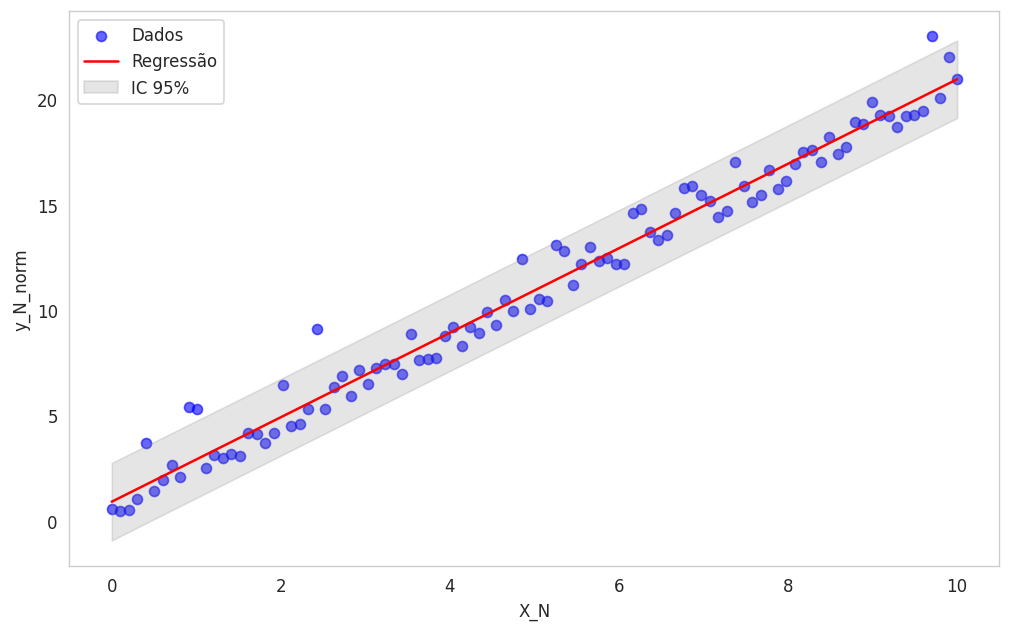

In [43]:
X_stat = sm.add_constant(X_N)
regsummary = sm.OLS(y_N_norm, X_stat).fit()
print('Distribuição Não Normal')
print(regsummary.summary())

Próximo topico: [Regressão linear múltipla;](https://colab.research.google.com/drive/1XKsLM7bbthGHI-vV-64gJNdB65gm1bkS?usp=sharing)